<a href="https://colab.research.google.com/github/pnvijay/walk_with_fastai/blob/main/02_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Sun Mar  8 06:37:42 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
# import os
# !pip install -q torch torchvision feather-format kornia pyarrow Pillow wandb nbdev fastprogress --upgrade
# !pip install -q git+https://github.com/fastai/fastcore --upgrade
# !pip install -q git+https://github.com/fastai/fastai2 --upgrade
# os._exit(00)
!pip install fastai2

     |████████████████████████████████| 184kB 8.9MB/s 


In [ ]:
from fastai2.basics import *
from fastai2.vision.all import *
from fastai2.callback.all import *
# from fastai2 import *

In [ ]:
folders = ['blue_bird', 'red_wing_black_bird', 'blue_jay']
files = ['blue_bird.csv', 'red_wing_black_bird.csv', 'blue_jay.csv']

In [ ]:
for x, fname in enumerate(folders):
  path = Path(f'/content/')
  dest = path/fname
  dest.mkdir(parents=True, exist_ok=True)

In [ ]:
# !rm /content/data/birds/blue_bird/*.*
# !rm /content/data/birds/blue_jay/*.*
# !rm /content/data/birds/red_wing_black_bird/*.*

In [ ]:
path.ls()

(#3) [Path('data/birds/red_wing_black_bird'),Path('data/birds/blue_bird'),Path('data/birds/blue_jay')]

In [ ]:
classes = ['blue_bird', 'red_wing_black_bird','blue_jay']

In [ ]:
download_images??

In [ ]:
path/files[0]

Path('data/birds/blue_bird.csv')

In [ ]:
for i, n in enumerate(classes):
  print(n)
  # file = open(path/files[i])
  download_images(path/folders[i], path/folders[i]/files[i], max_pics=200)

blue_bird


red_wing_black_bird


blue_jay


In [ ]:
# for n in classes:
#   print(n)
#   verify_images(path/n, delete=True)

imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

blue_bird


red_wing_black_bird


blue_jay


In [ ]:
imgs

(#9) [Path('data/birds/blue_bird/00000076.jpg'),Path('data/birds/blue_bird/blue_bird.csv'),Path('data/birds/blue_bird/00000112.jpg'),Path('data/birds/blue_bird/00000164.jpg'),Path('data/birds/red_wing_black_bird/00000091.jpg'),Path('data/birds/red_wing_black_bird/00000196.jpg'),Path('data/birds/red_wing_black_bird/red_wing_black_bird.csv'),Path('data/birds/blue_jay/00000098.jpg'),Path('data/birds/blue_jay/blue_jay.csv')]

In [ ]:
for im in imgs:
  im.unlink()

In [ ]:
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

blue_bird


red_wing_black_bird


blue_jay


In [ ]:
imgs

(#0) []

In [ ]:
birds = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items=get_image_files,
                  splitter = RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [ ]:
dbunch = birds.dataloaders(path,bs=32)

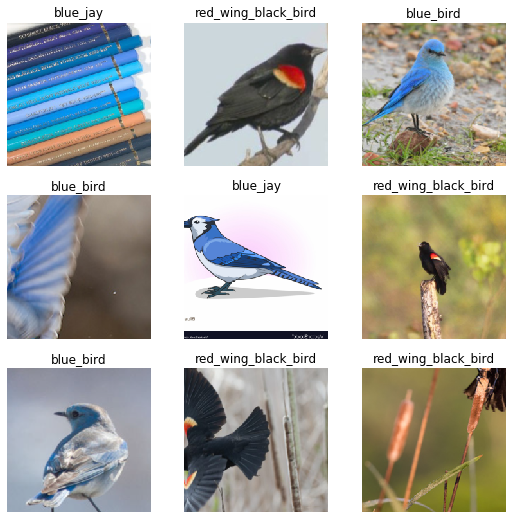

In [ ]:
dbunch.show_batch(max_n=9)

In [ ]:
dbunch.vocab

(#3) ['blue_bird','blue_jay','red_wing_black_bird']

In [ ]:
learn = cnn_learner(dbunch,resnet34,pretrained=True,metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.514180,0.127584,0.043860,00:11
1,0.898326,0.066187,0.026316,00:11
2,0.692782,0.064695,0.026316,00:11
3,0.545035,0.068773,0.017544,00:11


In [ ]:
learn.save('stage_1_34')

In [ ]:
learn.unfreeze()

(7.585775847473997e-08, 3.019951861915615e-07)

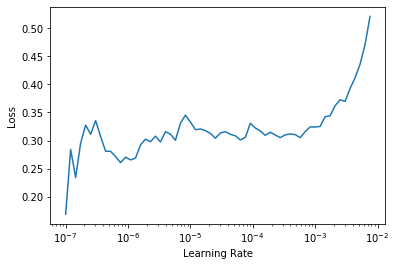

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(4,lr_max=slice(3e-5,2e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.228113,0.078324,0.043860,00:11
1,0.249604,0.097084,0.026316,00:11
2,0.230596,0.108560,0.035088,00:11
3,0.216491,0.100464,0.026316,00:11


In [ ]:
learn.save('stage_2_34')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

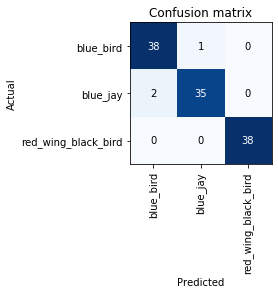

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
dbunch.valid_ds

(#114) [(PILImage mode=RGB size=628x416, TensorCategory(1)),(PILImage mode=RGB size=794x1059, TensorCategory(1)),(PILImage mode=RGB size=960x720, TensorCategory(2)),(PILImage mode=RGB size=660x440, TensorCategory(0)),(PILImage mode=RGB size=630x390, TensorCategory(0)),(PILImage mode=RGB size=1280x853, TensorCategory(2)),(PILImage mode=RGB size=2048x1152, TensorCategory(2)),(PILImage mode=RGB size=1500x1001, TensorCategory(2)),(PILImage mode=RGB size=500x361, TensorCategory(2)),(PILImage mode=RGB size=1200x720, TensorCategory(1))...]

In [ ]:
dbunch.train_ds

(#460) [(PILImage mode=RGB size=2400x1600, TensorCategory(1)),(PILImage mode=RGB size=1300x956, TensorCategory(2)),(PILImage mode=RGB size=600x400, TensorCategory(1)),(PILImage mode=RGB size=1952x2604, TensorCategory(0)),(PILImage mode=RGB size=570x570, TensorCategory(2)),(PILImage mode=RGB size=3748x2499, TensorCategory(1)),(PILImage mode=RGB size=800x640, TensorCategory(1)),(PILImage mode=RGB size=872x598, TensorCategory(1)),(PILImage mode=RGB size=667x500, TensorCategory(1)),(PILImage mode=RGB size=490x585, TensorCategory(2))...]

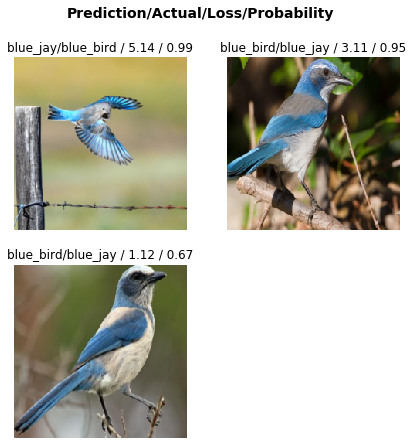

In [ ]:
interp.plot_top_losses(3,figsize=(7,7))